<a href="https://colab.research.google.com/github/AlfanMarcel/PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Alfan Marcel Mulyawan<br>
Kelas: TI-3A/08<br>
NIM: 2141720266

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [37]:
from google.colab.patches import cv2_imshow

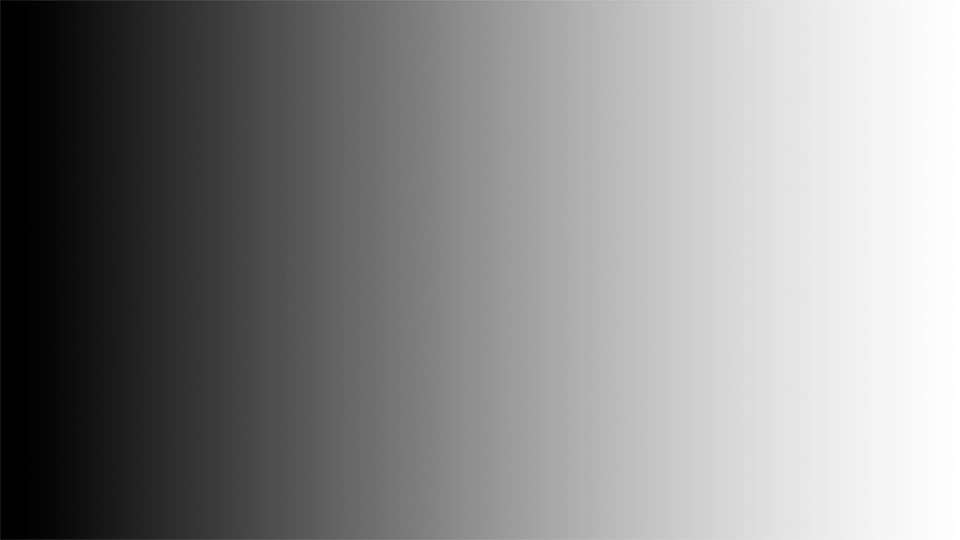

In [38]:
gradient=cv2.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
cv2_imshow(gradient)
height, width, _ = gradient.shape

In [39]:
newGrad = np.zeros_like(gradient)

In [40]:
if len(gradient.shape) == 3:
    gray_image = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)
else:
    gray_image = gradient

In [41]:
binary= newGrad
treshold= 170
for y in range(height):
    for x in range(width):
      pixel=gray_image[y,x]

      if (pixel >= treshold):
        binary[y,x]= 255
      else:
        binary[y,x]=0

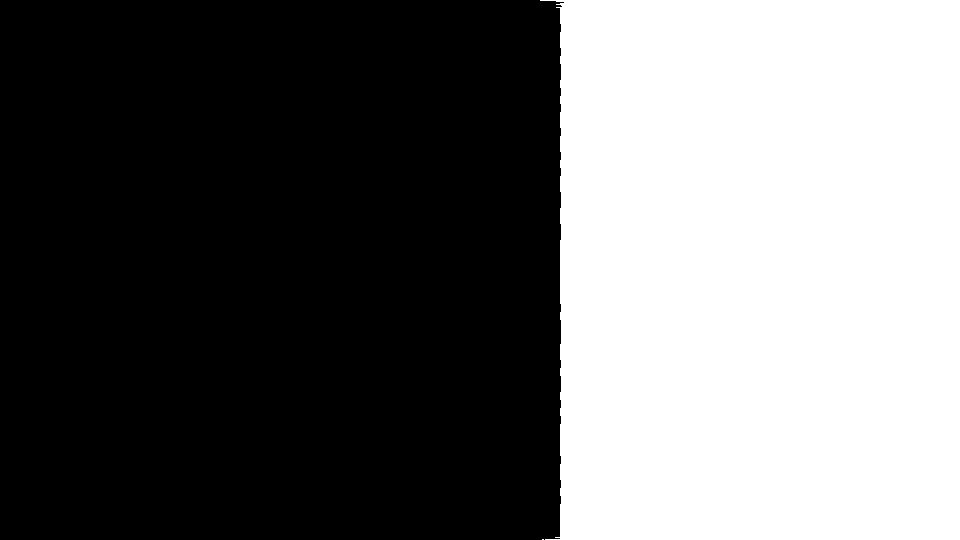

In [42]:
cv2_imshow(binary)

In [43]:
binaryInverted= newGrad
treshold= 170
for y in range(height):
    for x in range(width):
      pixel=gray_image[y,x]

      if (pixel >= treshold):
        binaryInverted[y,x]= 0
      else:
        binaryInverted[y,x]=255

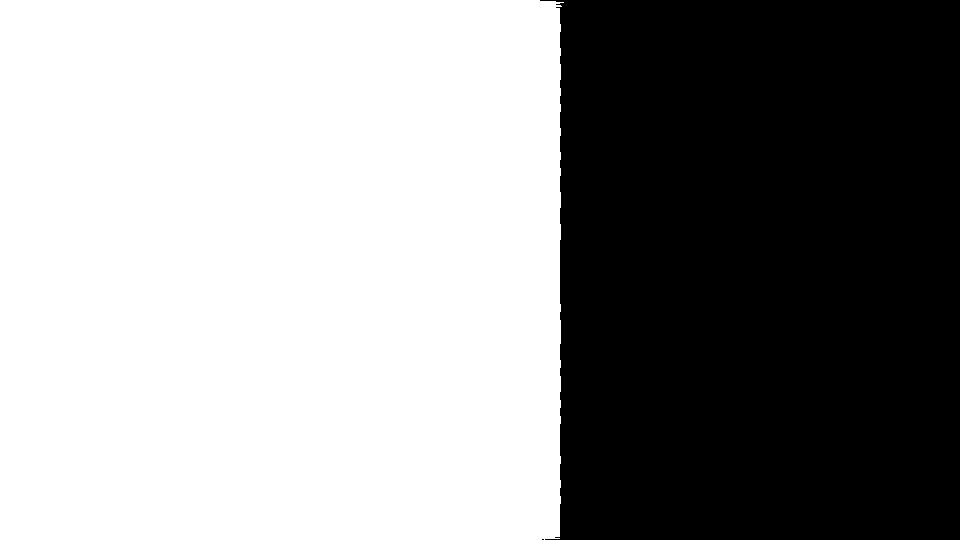

In [44]:
cv2_imshow(binaryInverted)

In [45]:
toZeroInv= newGrad
treshold= 170
for y in range(height):
    for x in range(width):
      pixel=gray_image[y,x]

      if (pixel >= treshold):
        toZeroInv[y,x]= 0
      else:
        toZeroInv[y,x]=gray_image[y,x]

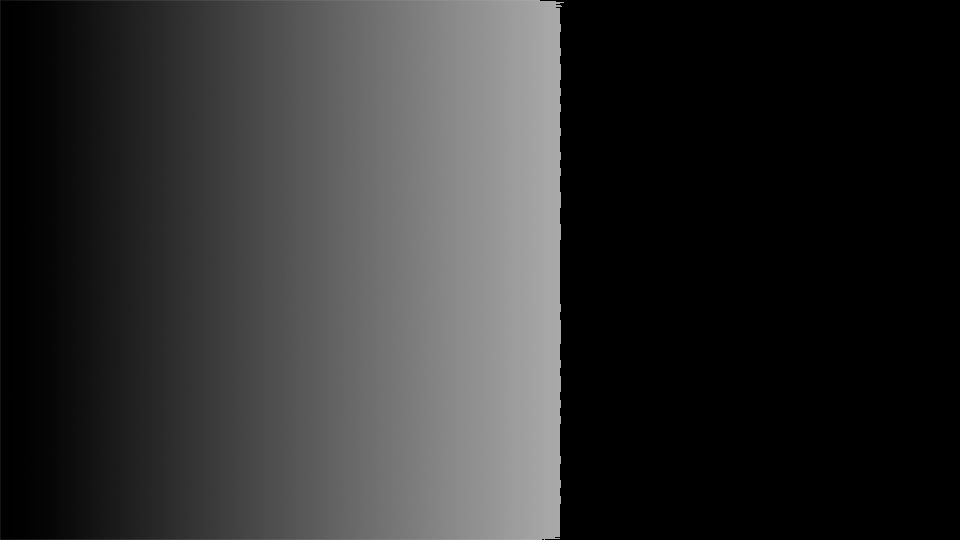

In [46]:
cv2_imshow(toZeroInv)

In [47]:
toZero= newGrad
treshold= 170
for y in range(height):
    for x in range(width):
      pixel=gray_image[y,x]

      if (pixel >= treshold):
        toZero[y,x]= gray_image[y,x]
      else:
        toZero[y,x]=0

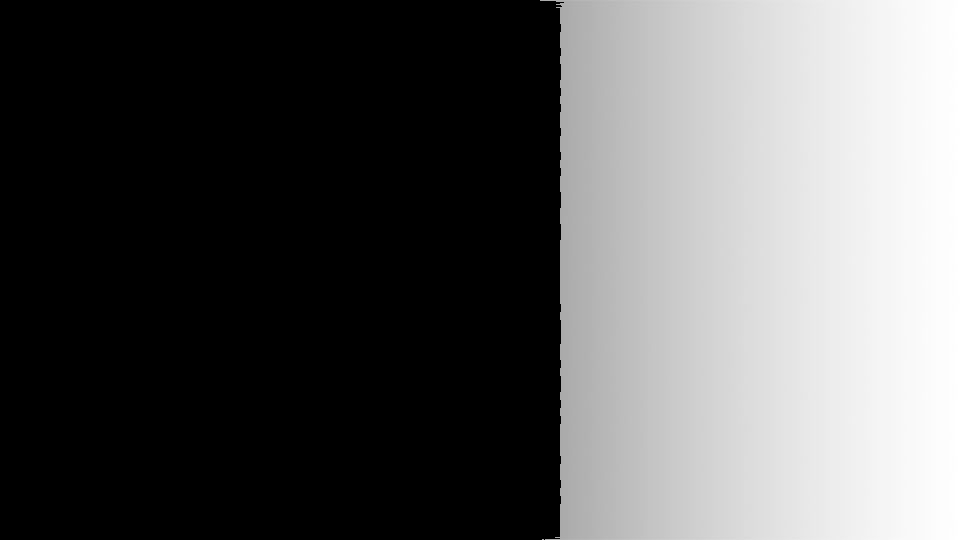

In [48]:
cv2_imshow(toZero)

In [51]:
trunc= newGrad
treshold= 170
for y in range(height):
    for x in range(width):
      pixel=gray_image[y,x]

      if (pixel >= treshold):
        trunc[y,x]= treshold
      else:
        trunc[y,x]=gray_image[y,x]

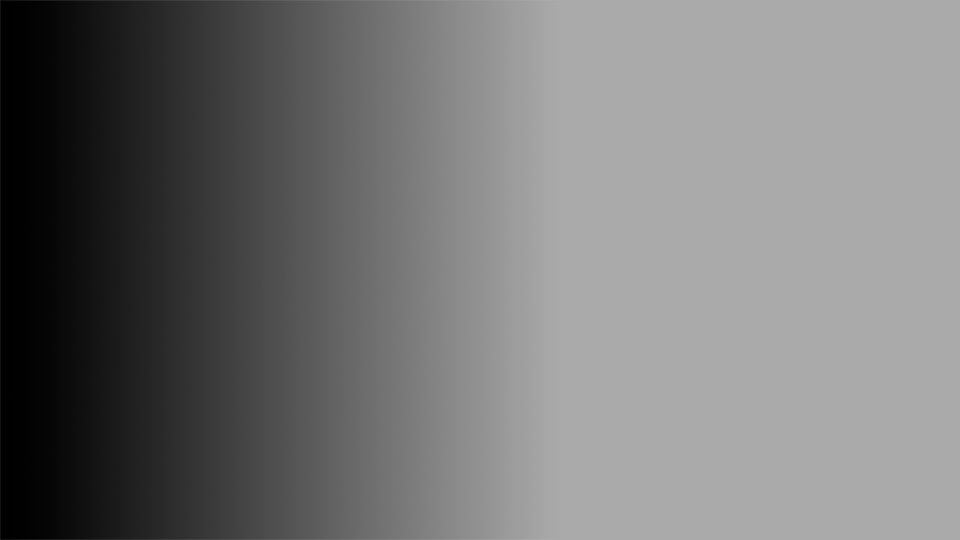

In [52]:
cv2_imshow(trunc)

Buat Otsu Thresholding tanpa menggunakan Library

global tresholding

In [53]:
globalImage = cv2.imread("/content/drive/MyDrive/PCVK/Images/ktp.png", cv2.IMREAD_GRAYSCALE)
thresh = 90
_, result = cv2.threshold(globalImage, thresh, 255, cv2.THRESH_BINARY)
# or do manually by following
globalImage[globalImage > thresh] = 255
globalImage[globalImage <= thresh] = 0

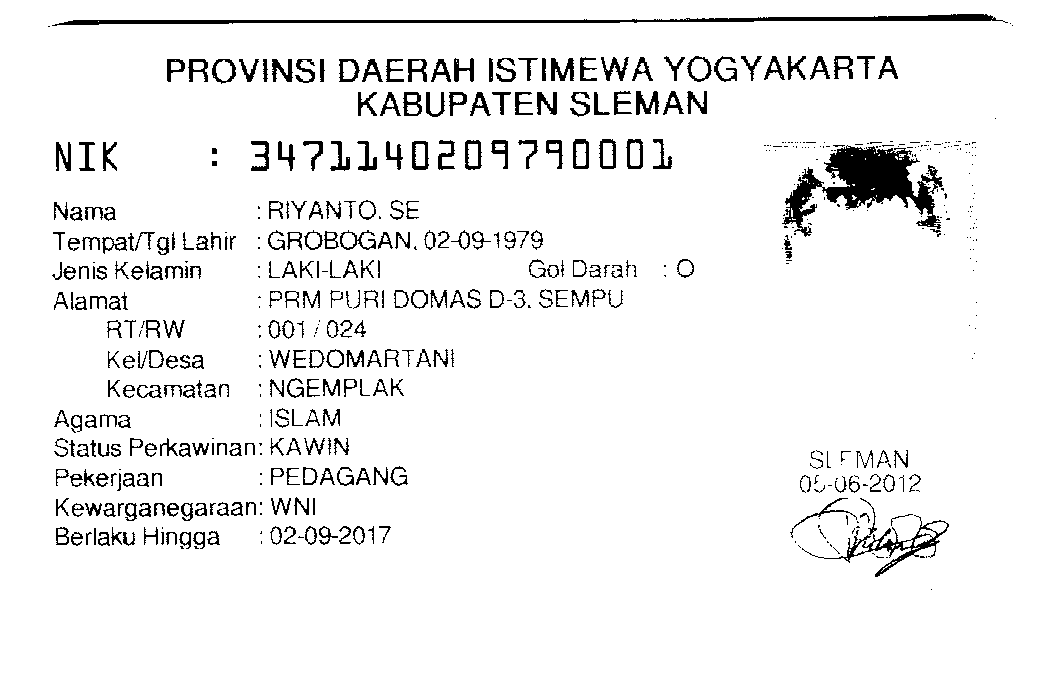

In [54]:
cv2_imshow(globalImage)

In [55]:
def _compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

In [56]:
def otsuThresholding(img: np.ndarray) -> np.ndarray:
    threshold_range = range(np.max(img)+1)
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    binary = img
    binary[binary > best_threshold] = 255
    binary[binary <= best_threshold] = 0

    return binary

In [57]:
ktp= cv2.imread("/content/drive/MyDrive/PCVK/Images/ktp.png", cv2.IMREAD_GRAYSCALE)
ktpNew=cv2.imread("/content/drive/MyDrive/PCVK/Images/ktp.png",0)
image=otsuThresholding(ktp)

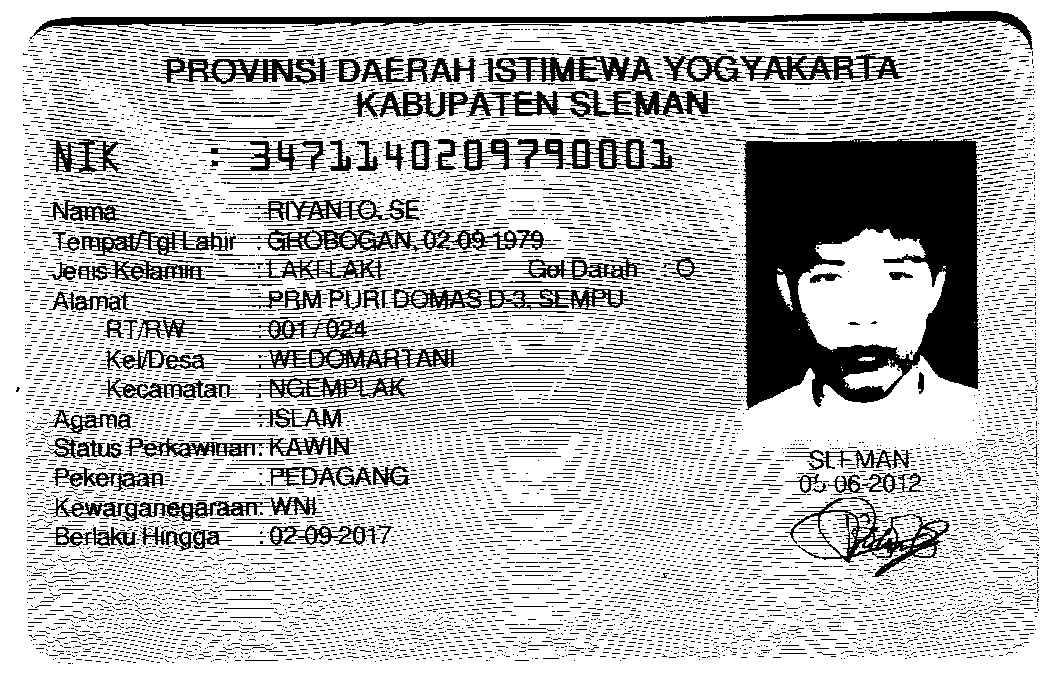

In [58]:
cv2_imshow(image)

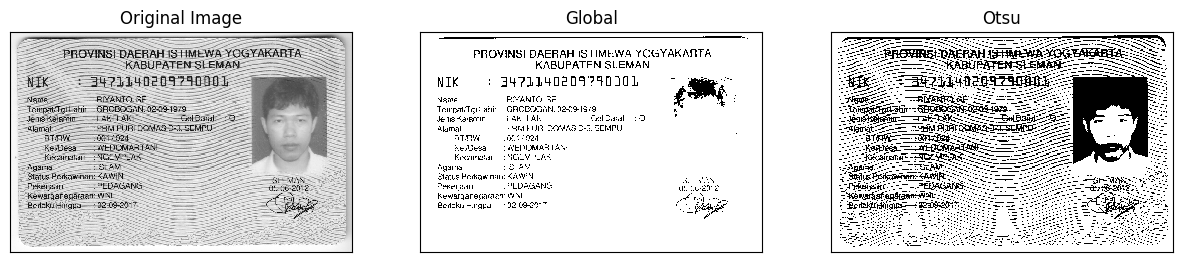

In [59]:
titles = ['Original Image', 'Global', 'Otsu']
images = [ktpNew, globalImage, image]
plt.figure(figsize = (15,9))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

#TUGAS

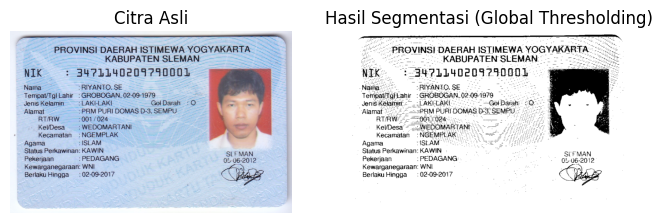

In [60]:
    img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan global thresholding
    ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Global Thresholding)')
    plt.axis('off')

    plt.show()

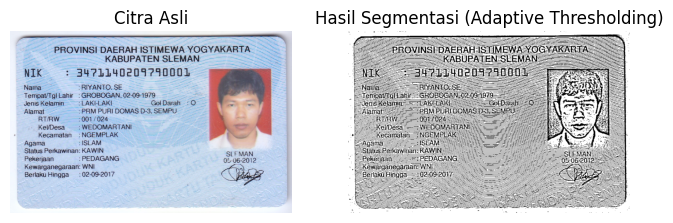

In [61]:
    img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan adaptive thresholding
    thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Adaptive Thresholding)')
    plt.axis('off')

    plt.show()

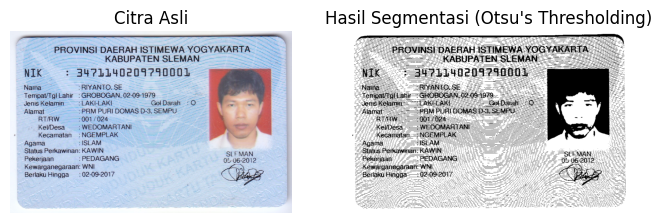

In [62]:
    img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan Otsu's Thresholding
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Otsu\'s Thresholding)')
    plt.axis('off')

    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


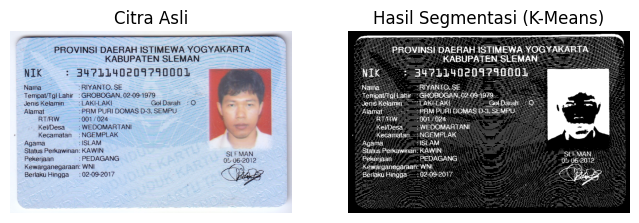

In [64]:
    from sklearn.cluster import KMeans
    img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan Otsu's Thresholding
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Ubah citra ke format yang dapat dikerjakan oleh K-Means
    img_flat = img.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=0)
    labels = kmeans.fit_predict(img_flat)
    segmented = labels.reshape(img.shape[0], img.shape[1])

    # Menampilkan gambar asli dan hasil segmentasi K-Means
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap='gray')
    plt.title('Hasil Segmentasi (K-Means)')
    plt.axis('off')

    plt.show()